# Simple model for spread of disease

## Modeling approach
In this notebook, we want to use Monte Carlo simulations for a simple analysis of how a disease like Corona Virus can spread, and how different measures like vaccination, contact tracing or social distancing can help . 

Consider a box as a model of our environment. We model humans with small particles that can move around. The humans move with some speed in some direction, and once they hit the walls of the box, they reflects back. In the following cells, we implement this:

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML, clear_output, display

def initialize(N, min_x, max_x, min_y, max_y, min_u, max_u, min_v, max_v):
    """
    this function takes maximum and minimum of x and y (coordinates) and u (velocity in x direction)
    and v (velocity in y direction) and initialize the values of x, y, u and v.

    inputs:
    -N: number of particles 
    -min_x: lowest value of x, i.e. left boundary of box
    -max_x: highest value of x, i.e. right boundary of box
    -min_y: lowest value of y, i.e. top boundary of box
    -max_y: highest value of y, i.e. left boundary of box
    -min_u: lowest value of u
    -max_u: highest value of u
    -min_v: lowest value of v
    -max_v: highest value of v

    outputs:
    -x: a np.array of size N of particles horizontal coordinate
    -y: a np.array of size N of particles vertical coordinate
    -u: a np.array of size N of particles horizontal velocity
    -v: a np.array of size N of particles vertical velocity

    """

    rand = lambda min_v, max_v : np.random.random(N) * (max_v - min_v) + min_v

    # lets choose these randomly.
    x = rand(min_x, max_x)
    y = rand(min_y, max_y)
    u = rand(min_u, max_u)
    v = rand(min_v, max_v)

    return x, y, u, v


We assume the particles move with a constant velocity. 
Write a function that updates position as a function of velocity

In [66]:
def update(x, y, u, v, dt):
  """
  this function updates x and y given the velocity values u and v, and the time step dt.

  inputs:
  -x: a np.array of size N of particles horizontal coordinate
  -y: a np.array of size N of particles vertical coordinate
  -u: a np.array of size N of particles horizontal velocity
  -v: a np.array of size N of particles vertical velocity
  -dt: time step

  output:
  -x: updated x
  -y: updated y
  """
  x += u * dt
  y += v * dt
  
  return x, y

When particles hit a wall, they bouce back. That means for example if we hit a vertical wall, the horizontal velocity should be negatived. Write this function.

In [67]:
def hit_wall_update(x, y, u, v, min_x, max_x, min_y, max_y):
  """
  this function updates u and v for the particles that have hit the walls
  
  inputs:
  -x: a np.array of size N of particles horizontal coordinate
  -y: a np.array of size N of particles vertical coordinate
  -u: a np.array of size N of particles horizontal velocity
  -v: a np.array of size N of particles vertical velocity
  -min_x: lowest value of x, i.e. left boundary of box
  -max_x: highest value of x, i.e. right boundary of box
  -min_y: lowest value of y, i.e. top boundary of box
  -max_y: highest value of y, i.e. left boundary of box

  output:
  -u: updated u
  -v: updated v
  """

  u[x > max_x] = -u[x > max_x] # right wall
  u[x < min_x] = -u[x < min_x] # left wall
  v[y > max_y] = -v[y > max_y] # bottom wall
  v[y < min_y] = -v[y < min_y] # top wall

  return u, v

Now we can write a function that simulates the motion of particles for a given number of time steps. 

In [68]:
def simulate(n_t, N, dt, min_x=-1, max_x=1, min_y=-1, max_y=1, min_u=-1, max_u=1, min_v=-1, max_v=1):
  """
  this function simulates motion of particle for `n_t` unit of time
  and store the x and y values for future processing

  inputs:
  -n_t: number of time steps simulated
  -N: number of particles
  -dt: timestep
  -see function initialize.py for other input parameters. 

  output:
  -history: a list of tuples (x, y) for all time steps. 
  """
  history = []
  x, y, u, v = initialize(N, min_x, max_x, min_y, max_y, min_u, max_u, min_v, max_v)

  for i in range(n_t):
    x, y = update(x, y, u, v, dt) # use update function to initialize x, y
    u, v = hit_wall_update(x, y, u, v, min_x, max_x, min_y, max_y) # use hit_wall_update function to initialize u, v

    history.append([x.copy(), y.copy()])

  return history


you probably need to use `x.copy(), y.copy()`? What is that, and why did I use this? This is very well explained here: https://www.programiz.com/python-programming/shallow-deep-copy

The following function is provided to visualize your simulations.
DO NOT CHANGE THIS, UNLESS YOU KNOW WHAT YOU'RE DOING.

In [69]:
def visualize(history, min_x=-1, max_x=1, min_y=-1, max_y=1, min_u=-1, max_u=1, min_v=-1, max_v=1, skip=1):
  """
  this function visualize the simulations.

  inputs:
  -hitory: a list of tuples (x, y) for all time steps. 
  -see function initialize.py for other input parameters. 

  """
  fig, ax = plt.subplots(figsize=(6, 6))
  fig.set_tight_layout(True)
  if len(history[0]) == 2:
    x, y = history[0]
    c = 'g'
  else:
    x, y, c = history[0]
  p = ax.scatter(x, y, c=c, s=50)
  plt.xlim([min_x, max_x])
  plt.ylim([min_y, max_y])
  plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
  plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
  plt.gca().set_aspect('equal', 'box')

  def update_frame(idx):
    if len(history[idx]) == 2:
      x, y = history[idx]
      c = 'g'
    else:
      x, y, c = history[idx]
    # p.set_xdata(x)
    # p.set_ydata(y)
    p.set_offsets(np.c_[x,y])
    p.set_facecolors(c)

    return p
  
  anim = FuncAnimation(fig, update_frame, frames=np.arange(0, len(history), skip), interval=50, repeat=False)
  return anim

Run a simulation with `N=5` particles for `n_t=100` timesteps with `dt=0.1`

visualize your simulations with 
`HTML(anim.to_html5_video())`

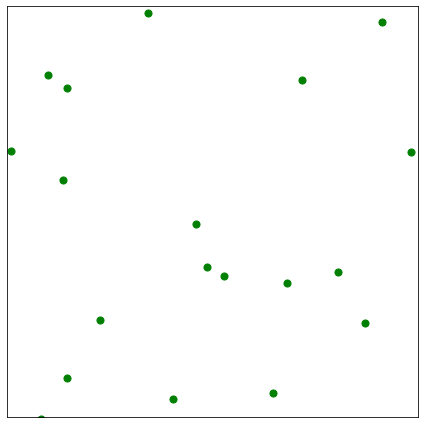

In [70]:
hist = simulate(100, 20, 0.1)
anim = visualize(hist)
 
anim.save('exports/monte_bouncy.gif', writer='pillow')

Now we want to implement particles collision. We assume when two particles collide, each move exactly in the opposite direction. 
Write this function.

In [71]:
def hit_each_other_update(x, y, u, v, EPS=0.05):
  """
  this function updates u and v for the particles that have hit each other
  
  inputs:
  -x: a np.array of size N of particles horizontal coordinate
  -y: a np.array of size N of particles vertical coordinate
  -u: a np.array of size N of particles horizontal velocity
  -v: a np.array of size N of particles vertical velocity
  -EPS: maximum distance between two colliding particles. 

  output:
  -u: updated u
  -v: updated v
  """

  N = len(x) # complete this line # number of particles
  for i in range(N - 1):
    # complete this line to find distance between particles i and all particles i+1:N
    d_ij = np.sqrt((x[i] - x[i+1:]) ** 2 + (y[i] - y[i+1:]) ** 2)

    if np.min(d_ij) > EPS: # no particle collides with particle i
      continue
    else:
      idx = np.argmin(d_ij)
      idx += i + 1

      assert np.sqrt((x[i] - x[idx]) ** 2 + (y[i] - y[idx]) ** 2) < EPS
      u[i]   = -u[i]
      u[idx] = -u[idx]
      v[i]   = -v[i]
      v[idx] = -v[idx]

  return u, v

Update `simulate` function and include the collision as well. 

In [72]:
def simulate(n_t, N, dt, min_x=-1, max_x=1, min_y=-1, max_y=1, min_u=-1, max_u=1, min_v=-1, max_v=1):
    """
    this function simulates motion of particle for `n_t`
    and store the x and y values for future processing

    inputs:
    -n_t: number of time steps simulated
    -N: number of particles
    -dt: timestep
    -see function initialize.py for other input parameters. 

    output:
    -history: a list of tuples (x, y) for all time steps. 
    """
    history = []
    x, y, u, v = initialize(N, min_x, max_x, min_y, max_y, min_u, max_u, min_v, max_v)
  
    for i in range(n_t):
        x, y = update(x, y, u, v, dt) # use update function to initialize x, y
        u, v = hit_wall_update(x, y, u, v, min_x, max_x, min_y, max_y) # use hit_wall_update function to initialize u, v
        u, v = hit_each_other_update(x, y, u, v)

        history.append([x.copy(), y.copy()])

    return history

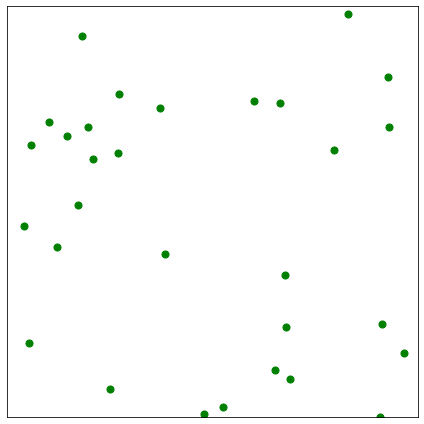

In [73]:
hist = simulate(400, 30, 0.05)
anim = visualize(hist)
anim.save('exports/monte_bouncy_person.gif', writer='pillow')

So far the particles all have same color. Now we assign colors to denote whether a particle is infectious or not. Define a new function that return a numpy array where the first `m` entries are `'r'` (i.e. sick) and the rest are `'g'` (i.e. healthy)

In [74]:
def initialize_disease(N, m):
    """
    this function assigns the first m entries as sick and then te particles as sick.

    inputs:
    -N: number of particles 
    -m: number of sick particles

    outputs:
    -c: a np.array of size N of 'r' (sick) and 'g' (healthy)
    """

    c = np.array(["g"] * (N - m) + ["r"] * (m))
    return c

copy paste `hit_each_other_update` function. Rename to `hit_each_other_update_with_color`. Make appropriate changes such that the disease is infected on each collision. 

In [75]:
def hit_each_other_update_with_color(x, y, c, u, v, EPS=0.05):
  """
  this function updates u and v and c (color) for the particles that have each other
  
  inputs:
  -x: a np.array of size N of particles horizontal coordinate
  -y: a np.array of size N of particles vertical coordinate
  -c: a np.array of size N of 'r' (sick) and 'g' (healthy)
  -u: a np.array of size N of particles horizontal velocity
  -v: a np.array of size N of particles vertical velocity
  -EPS: maximum distance between two colliding particles. 

  output:
  -u: updated u
  -v: updated v
  -c: updated c
  """

  N = len(x) # complete this line # number of particles
  for i in range(N - 1):
    # complete this line to find distance between particles i and all particles i+1:N
    d_ij = np.sqrt((x[i] - x[i+1:]) ** 2 + (y[i] - y[i+1:]) ** 2)

    if np.min(d_ij) > EPS: # no particle collides with particle i
      continue
    else:
      idx = np.argmin(d_ij)
      idx += i + 1

      u[i]   = -u[i]
      u[idx] = -u[idx]
      v[i]   = -v[i]
      v[idx] = -v[idx]

      if c[i] == "r" or c[idx] == "r":
        c[i] = "r"
        c[idx] = "r"
        
  return u, v, c

write `simulate_with_color` to simulate particles with their colors.

In [76]:
def simulate_with_color(n_t, N, dt, m, min_x=-1, max_x=1, min_y=-1, max_y=1, min_u=-1, max_u=1, min_v=-1, max_v=1):
    """
    this function simulates motion of particle for `n_t`
    and store the x and y values as well as c (color) for future processing

    inputs:
    -n_t: number of time steps simulated
    -N: number of particles
    -dt: timestep
    -m: number of sick particles
    -see function initialize.py for other input parameters. 

    output:
    -history: a list of tuples (x, y) for all time steps. 
    """
    history = []
    x, y, u, v = initialize(N, min_x, max_x, min_y, max_y, min_u, max_u, min_v, max_v)
    c = initialize_disease(N, m)
  
    for i in range(n_t):
        x, y = update(x, y, u, v, dt) # use update function to initialize x, y
        u, v = hit_wall_update(x, y, u, v, min_x, max_x, min_y, max_y) # use hit_wall_update function to initialize u, v
        u, v, c = hit_each_other_update_with_color(x, y, c, u, v)

        history.append([x.copy(), y.copy(), c.copy()])

    return history

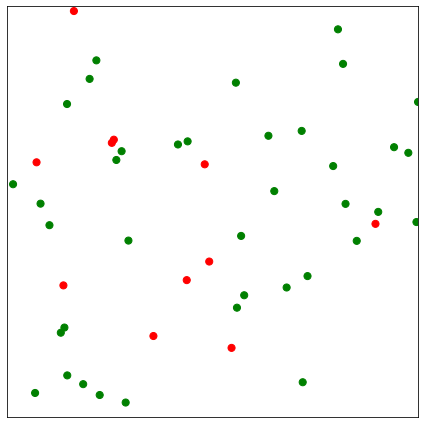

In [77]:
hist = simulate_with_color(300, 50, 0.05, 10)
anim = visualize(hist)

anim.save('exports/monte_color.gif', writer='pillow')

### Analysis
Now that we have this model, we can do some analysis. Saturation time is the time that it takes for the entire population to be infected. 


In [78]:
def saturation_time(N, dt, m, min_x=-1, max_x=1, min_y=-1, max_y=1, min_u=-1, max_u=1, min_v=-1, max_v=1):
    """
    this function is similar to simulate_with_color, except the simulations will 
    continue until the entire population is infected. 

    inputs:
    -N: number of particles
    -dt: timestep
    -m: number of sick particles
    -see function initialize.py for other input parameters. 

    output:
    -history: a list of tuples (x, y) for all time steps. 
    -sat_time : time it took the entire population to get sick.
    """
    history = []
    x, y, u, v = initialize(N, min_x, max_x, min_y, max_y, min_u, max_u, min_v, max_v)
    c = initialize_disease(N, m)
    sat_time = 0
    max_sat_time = 400
  
    while sat_time < max_sat_time:
        x, y = update(x, y, u, v, dt) # use update function to initialize x, y
        u, v = hit_wall_update(x, y, u, v, min_x, max_x, min_y, max_y) # use hit_wall_update function to initialize u, v
        u, v, c = hit_each_other_update_with_color(x, y, c, u, v)

        history.append([x.copy(), y.copy(), c.copy()])

        sat_time += 1
        if (c == "r").sum()  == len(c):
            return history, sat_time

    return history, max_sat_time

Text(0, 0.5, 'number of sick particles')

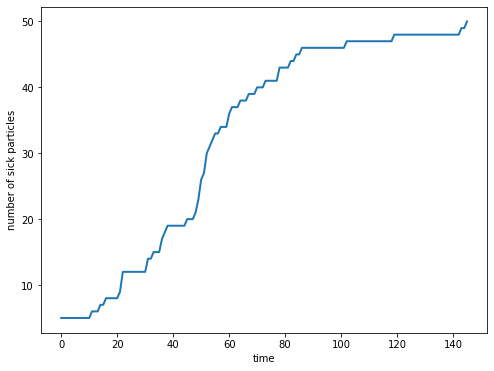

In [79]:
history, itr = saturation_time(50, 0.1, 5)
n_sick = [sum(h[2] == "r") for h in history]

plt.figure(figsize=(8,6))
plt.plot(n_sick, linewidth=2)
plt.xlabel("time")
plt.ylabel("number of sick particles")

For `N=50` find the saturation time when the initial infected population are 5%, 10% or 20%. In each case, repeat your experiment 1000 times, and report the mean. set `dt=0.1`

In [80]:
dt = 0.1
N = 50
saturation_experiments = []
for m in [5, 10, 20]:
    saturation_experiment = [saturation_time(N, dt, m)[1] for i in range(100)]
    sat_mean = np.mean(saturation_experiment)
    saturation_experiments.append(sat_mean)

    print(f"m={m}, saturation time = {sat_mean}")

m=5, saturation time = 121.88
m=10, saturation time = 97.59
m=20, saturation time = 75.02


For `N=200, dt=0.1`, run saturation time experiment for `m=1, 10` and `25`.
This time plot number of sick particles as a function of time. What does this plot tell you?

(0.0, 100.0)

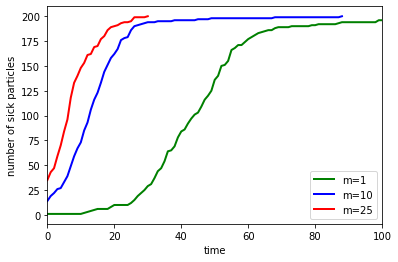

In [82]:
N, dt, m = 200, 0.1, 1
history1, itr = saturation_time(N, dt, m)
n_sick1 = [sum(h[2] == "r") for h in history1]

N, dt, m = 200, 0.1, 10
history2, itr = saturation_time(N, dt, m)
n_sick2 = [sum(h[2] == "r") for h in history2]

N, dt, m = 200, 0.1, 25
history3, itr = saturation_time(N, dt, m)
n_sick3 = [sum(h[2] == "r") for h in history3]

plt.plot(n_sick1, 'g', label="m=1", linewidth=2)
plt.plot(n_sick2, 'b', label="m=10", linewidth=2)
plt.plot(n_sick3, 'r', label="m=25", linewidth=2)
plt.xlabel("time")
plt.ylabel("number of sick particles")
plt.legend()
plt.xlim([0,100])

What else can you try with this model? Here are some ideas:


*   Implement curing: That mean after $\alpha$ timesteps, the sick particles are cured. 
*   Implement vaccination: that means if a particle is vaccinated, it won't get sick
*   Implement social distancing: for example, a portion of the populations does not move anymore. 
*   Implement clustering: a certain area is infectious. for example, if the particles enter the bottom left quadrant, they get sick. 




